In [1]:
import scanpy as sc
import anndata as ad
import numpy as np
import glob

In [ ]:
new_path = "/media/desk16/iy66914/JZF"
os.chdir(new_path)
adata = sc.read_h5ad("./adata_cluster.h5ad")

In [15]:
import os

current_path = os.getcwd()
print("当前路径:", current_path) 

当前路径: /home/jpc/JZF


In [3]:
adata = sc.read_h5ad("./adata_cluster.h5ad")

In [4]:
s_genes = [
    "MCM5", "PCNA", "TYMS", "FEN1", "MCM2", "MCM4", "RRM1",
    "UNG", "GINS2", "MCM6", "CDCA7", "DTL", "PRIM1", "UHRF1",
    "HELLS", "RFC2", "RPA2", "NASP", "RAD51AP1", "GMNN", "WDR76",
    "SLBP", "CCNE2", "UBR7", "POLD3", "MSH2", "ATAD2", "RAD51",
    "RRM2", "CDC45", "CDC6", "EXO1", "TIPIN", "DSCC1", "BLM",
    "CASP8AP2", "USP1", "CLSPN", "POLA1", "CHAF1B", "BRIP1", "E2F8"
]

g2m_genes = [
    "HMGB2", "CDK1", "NUSAP1", "UBE2C", "BIRC5", "TPX2", "TOP2A", "NDC80",
    "CKS2", "NUF2", "CKS1B", "MKI67", "TMPO", "CENPF", "TACC3", "SMC4",
    "CCNB2", "CKAP2L", "CKAP2", "AURKB", "BUB1", "KIF11", "ANP32E", "TUBB4B",
    "GTSE1", "KIF20B", "HJURP", "CDCA3", "CDC20", "TTK", "CDC25C", "KIF2C",
    "RANGAP1", "NCAPD2", "DLGAP5", "CDCA2", "CDCA8", "ECT2", "KIF23", "HMMR",
    "AURKA", "PSRC1", "ANLN", "LBR", "CKAP5", "CENPE", "CTCF", "NEK2",
    "G2E3", "GAS2L3", "CBX5", "CENPA"
]


# 细胞周期评估
#sc.tl.score_genes_cell_cycle(adata, s_genes=s_genes, g2m_genes=g2m_genes)

In [5]:
sc.tl.pca(adata,n_comps=50)

In [106]:
adata

AnnData object with n_obs × n_vars = 157988 × 25365
    obs: 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'doublet_score', 'predicted_doublet', 'leiden_res_0.20', 'leiden_res_0.40', 'leiden_res_0.60', 'leiden_res_0.80', 'leiden_res_1.00', 'leiden_res_1.20', 'leiden_res_1.40', 'leiden_res_1.60', 'leiden_res_1.80', 'leiden_res_2.00', 'S_score', 'G2M_score', 'phase', 'leiden'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches',

In [9]:
adata.obs["leiden"] = adata.obs["leiden_res_0.60"]

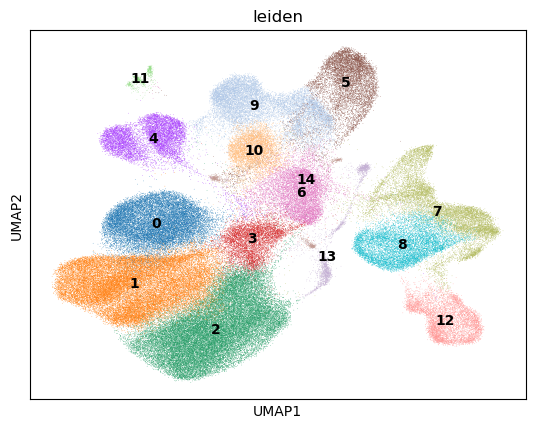

In [10]:
sc.pl.umap(
    adata,
    color=["leiden"],
    legend_loc="on data",
)

In [11]:
adata

AnnData object with n_obs × n_vars = 157988 × 25365
    obs: 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'doublet_score', 'predicted_doublet', 'leiden_res_0.20', 'leiden_res_0.40', 'leiden_res_0.60', 'leiden_res_0.80', 'leiden_res_1.00', 'leiden_res_1.20', 'leiden_res_1.40', 'leiden_res_1.60', 'leiden_res_1.80', 'leiden_res_2.00', 'S_score', 'G2M_score', 'phase', 'leiden'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches',

In [12]:
import scipy.sparse as sparse
import scipy.io as sio
import scipy.stats as stats
import os

In [13]:
umap_df = adata.obs.copy()
umap_df[['UMAP1', 'UMAP2']] = adata.obsm['X_umap']
umap_df.head()

sample  n_genes_by_counts  log1p_n_genes_by_counts  total_counts  \
CELL1_N2    HTJT               1246                 7.128496        2641.0   
CELL2_N2    HTJT               2520                 7.832411        7083.0   
CELL8_N3    HTJT               1268                 7.145984        3866.0   
CELL10_N2   HTJT               1288                 7.161622        3901.0   
CELL11_N2   HTJT               1467                 7.291656        4106.0   

           log1p_total_counts  pct_counts_in_top_50_genes  \
CELL1_N2             7.879292                   26.656569   
CELL2_N2             8.865594                   31.342651   
CELL8_N3             8.260234                   36.575272   
CELL10_N2            8.269244                   35.324276   
CELL11_N2            8.320448                   32.951778   

           pct_counts_in_top_100_genes  pct_counts_in_top_200_genes  \
CELL1_N2                     38.394548                    51.419917   
CELL2_N2                     39.248906                    48.722293   
CELL8_N3                     51.733057                    65.028453   
CELL10_N2                    50.499872                    63.342733   
CELL11_N2                    45.372625                    57.866537   

           pct_counts_in_top_500_genes  total_counts_mt  ...  leiden_res_1.40  \
CELL1_N2                     71.753124             65.0  ...                0   
CELL2_N2                     64.097134            102.0  ...                4   
CELL8_N3                     80.134506             86.0  ...                5   
CELL10_N2                    79.800051             32.0  ...                0   
CELL11_N2                    74.963468             38.0  ...                7   

           leiden_res_1.60  leiden_res_1.80  leiden_res_2.00   S_score  \
CELL1_N2                 0                0                0  0.003318   
CELL2_N2                 1                2                2 -0.005169   
CELL8_N3                 2                3                3 -0.029017   
CELL10_N2                0                0                0 -0.026305   
CELL11_N2                6                8                9 -0.023555   

           G2M_score  phase  leiden     UMAP1      UMAP2  
CELL1_N2    0.019487    G2M       0 -1.816806   6.479633  
CELL2_N2   -0.084757     G1       5  6.411479  13.060095  
CELL8_N3   -0.067922     G1       2 -0.799031  -1.514131  
CELL10_N2  -0.013071     G1       0 -2.251410   6.279605  
CELL11_N2  -0.034693     G1       1 -2.954329   2.252396  

[5 rows x 37 columns]

In [14]:
umap_df.columns

Index(['sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts',
       'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes',
       'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes',
       'pct_counts_in_top_500_genes', 'total_counts_mt',
       'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo',
       'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb',
       'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'doublet_score',
       'predicted_doublet', 'leiden_res_0.20', 'leiden_res_0.40',
       'leiden_res_0.60', 'leiden_res_0.80', 'leiden_res_1.00',
       'leiden_res_1.20', 'leiden_res_1.40', 'leiden_res_1.60',
       'leiden_res_1.80', 'leiden_res_2.00', 'S_score', 'G2M_score', 'phase',
       'leiden', 'UMAP1', 'UMAP2'],
      dtype='object')

In [16]:
#geneinfo=all_data.var
#mtx=all_data.X.T
umap_df.to_csv("./umap_df.csv")
#sio.mmwrite("/home/jpc/ICI/GSE229353/data/sparse_matrix.mtx",mtx)

In [42]:
marker_genes = { 
  "Immu": ["PTPRC"],
  "Mast cells":["TPSAB1","CPA3","MS4A2"],
  "ILC":["KIT","KLRF1","IL7R"],
  #"Cell Cycle" :["TOP2A","MKI67"],
  "Monocyte":["CD68","FCGR3A","CD14","MARCO"],
  "B cells":["CD79A","CD79B","CD19","MS4A1"],
  "Plasma cells":["JCHAIN","IGKC"],
 # "platelets":["PF4", "PPBP"], #,"GP9"
  "T cells":["CD3D","CD3E","CD3G"],
  "CD4+ T cells":["CD4"],
  "CD8+ T cells":["CD8A","CD8B"],
  "NK" :["NKG7","KLRG1","KLRC1"],
    "Myeloid":["CD14", "LYZ", "S100A8", "FCGR3A"],
  "DC":["CD1C","LAMP3"] ,
    "Macro":["CD68","LYZ","MSR1","CD163","MRC1"],
  "Neu":["FCGR3B","CXCR2","SLC25A37","G0S2","CXCR1","ADGRG3"],
    "Epi": ["EPCAM", "KRT18",  "KRT19"],
    "Fibroblasts": ["PDGFRA", "PDGFRB", "COL1A1", "COL1A2", "DCN", "FAP"], #, "LUM"
    "Myofibroblasts": ["ACTA2", "TAGLN", "MYH11"],
    "Endo": ["PECAM1", "VWF", "CDH5", "ENG", "TIE1", "CLDN5"],
    "Pericytes": ["RGS5", "PDGFRB", "CSPG4", "MCAM", "ACTA2"]
}

In [17]:
marker_genes = { 
  "Myofibroblast": ["MYL9","MYH11"],
  "Cholangiocyte":["EPCAM", "KRT7",  "KRT19"],
  "HSC":["COL1A1", "COL3A1", "DCN"],
  "Hepatocyte" :["APOC3","HP","ALB"],
     "Mast cells":["TPSAB1","CPA3","MS4A2"],
  "Endothelial":["PECAM1","CDH5", "TIE1", "CLDN5"],
  #"Macro/mono":["CD79A","CD79B","CD19","MS4A1"],
  "Myeloid": ["CD14","MS4A7","FCGR3A"],
  "Neutrophil":["C1QA","G0S2"],
    "B cells":["CD79A","CD79B","CD19","MS4A1"],
     "Plasma cells":["IGKC","JCHAIN","MZB1"],
    "T cell":["CD3D","CD3E","CD3G"],
     "NK" :["NKG7","KLRG1","KLRC1"]}

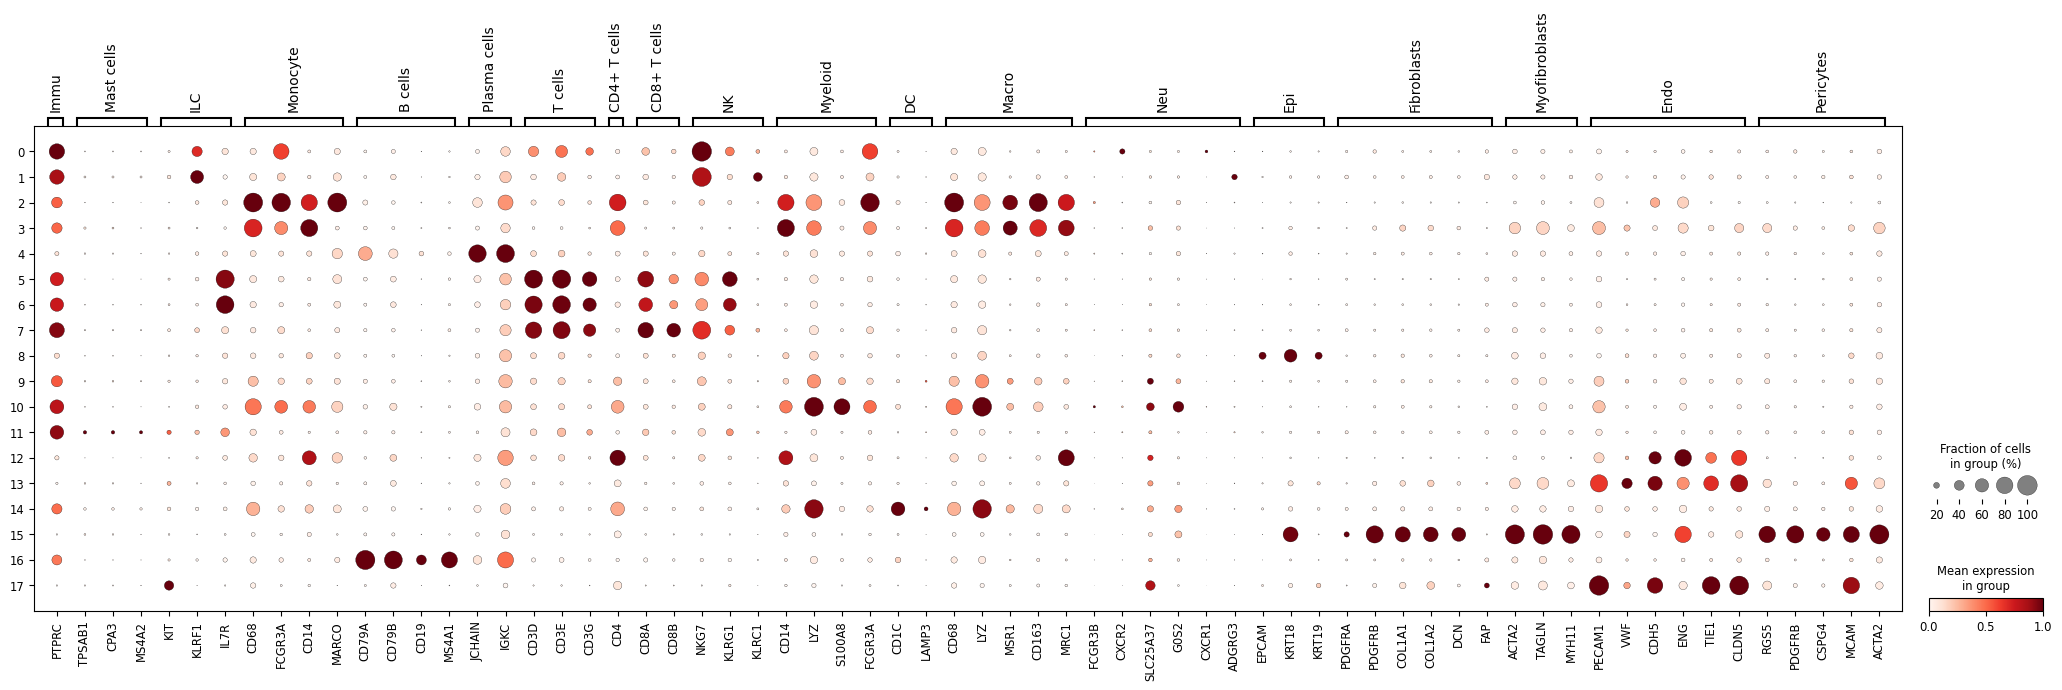

In [43]:
sc.pl.dotplot(adata_filtered, marker_genes, groupby="leiden_res_1.00", standard_scale="var")

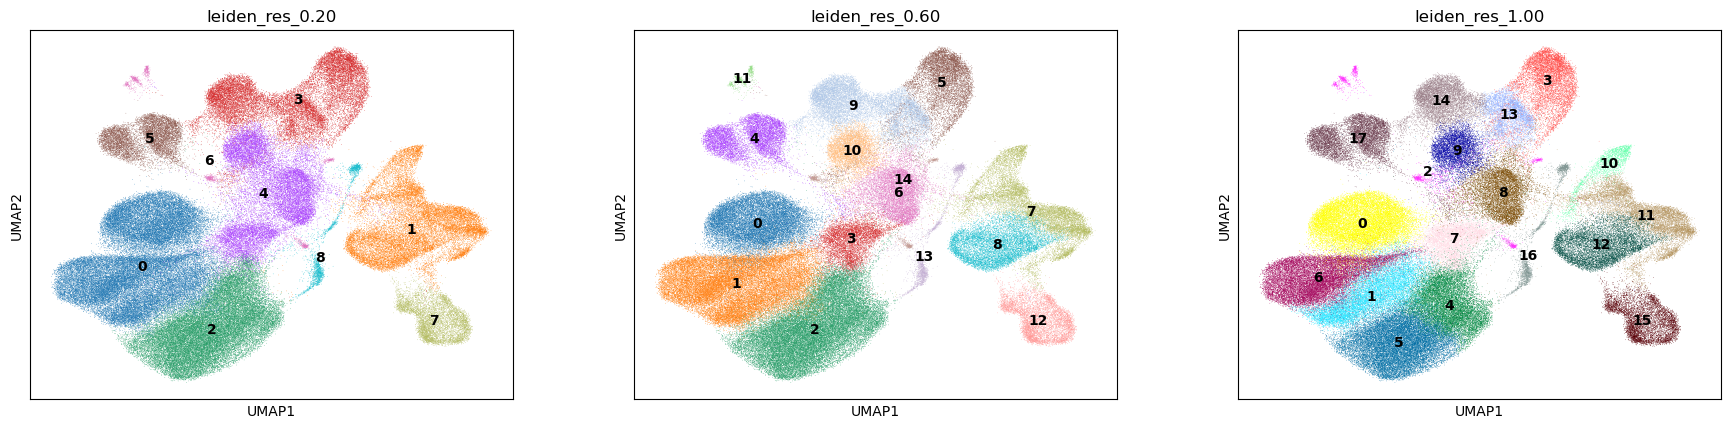

In [21]:
sc.pl.umap(
    adata,
    color=["leiden_res_0.20", "leiden_res_0.60", "leiden_res_1.00"],
    legend_loc="on data",
)

In [22]:
adata_1 = adata.copy()

KeyboardInterrupt: 

In [28]:
#adata_filtered = adata[adata.obs["predicted_doublet"] == 'False'].copy()
adata_filtered = adata[adata.obs["predicted_doublet"] == False].copy()


In [27]:
adata.obs["predicted_doublet"].unique()

array([False,  True])

In [ ]:
adata_filtered

In [30]:
import bbknn

# 1. 使用 BBKNN 整合邻接图（基于 harmony 的输出）
sc.external.pp.bbknn(adata_filtered, batch_key='sample')
sc.tl.umap(adata_filtered)
for res in np.arange(0.2, 2.01, 0.2):
    sc.tl.leiden(
        adata_filtered, key_added=f"leiden_res_{res:4.2f}", resolution=res, flavor="igraph"
    )

In [56]:
sc.tl.umap( adata_filtered, 
    min_dist=0.3,  
gamma=1.5)

In [57]:
sc.tl.leiden(
        adata_filtered, resolution=1.00, flavor="igraph" )


In [62]:
adata_filtered.obs.keys()

Index(['sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts',
       'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes',
       'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes',
       'pct_counts_in_top_500_genes', 'total_counts_mt',
       'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo',
       'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb',
       'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'doublet_score',
       'predicted_doublet', 'leiden_res_0.20', 'leiden_res_0.40',
       'leiden_res_0.60', 'leiden_res_0.80', 'leiden_res_1.00',
       'leiden_res_1.20', 'leiden_res_1.40', 'leiden_res_1.60',
       'leiden_res_1.80', 'leiden_res_2.00', 'S_score', 'G2M_score', 'phase',
       'leiden', 'cell_type'],
      dtype='object')

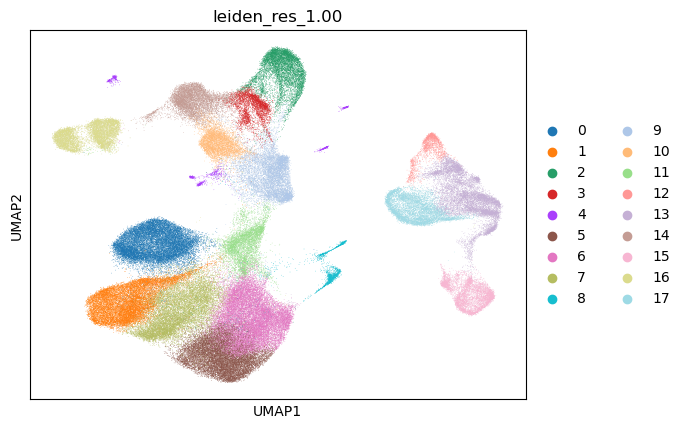

In [63]:
sc.pl.umap(adata_filtered, color=["leiden_res_1.00"])

/home/jpc/anaconda3/envs/scanpy_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25972 (\N{CJK UNIFIED IDEOGRAPH-6574}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/jpc/anaconda3/envs/scanpy_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 21512 (\N{CJK UNIFIED IDEOGRAPH-5408}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/jpc/anaconda3/envs/scanpy_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25928 (\N{CJK UNIFIED IDEOGRAPH-6548}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/jpc/anaconda3/envs/scanpy_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26524 (\N{CJK UNIFIED IDEOGRAPH-679C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


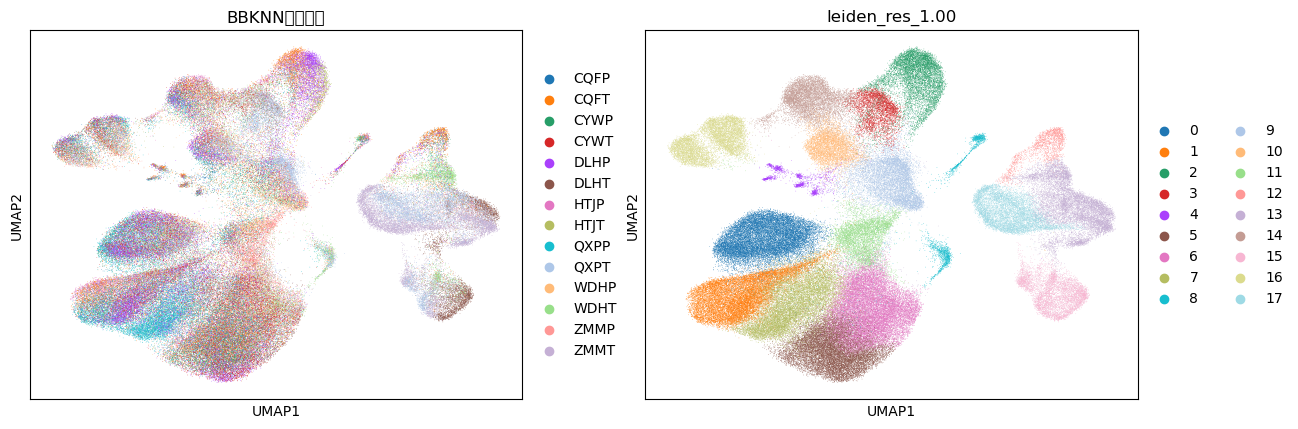

In [31]:
sc.pl.umap(adata_filtered, color=["sample", "leiden_res_1.00"], title="BBKNN整合效果")

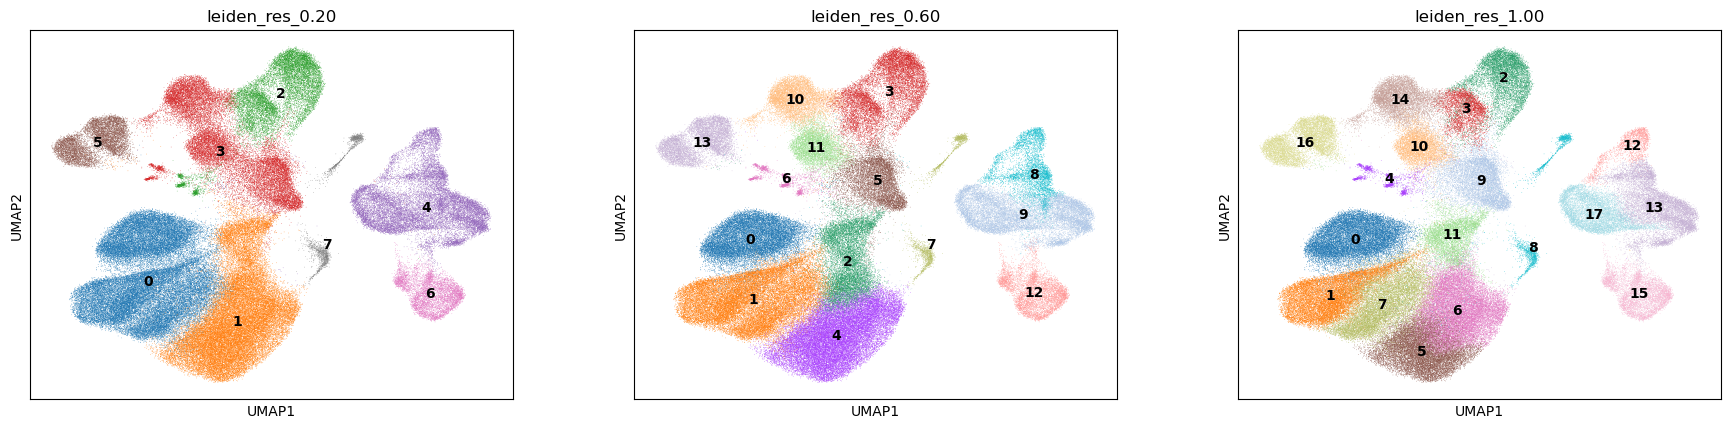

In [36]:
sc.pl.umap(
    adata_filtered,
    color=["leiden_res_0.20", "leiden_res_0.60", "leiden_res_1.00"],
    legend_loc="on data",
)

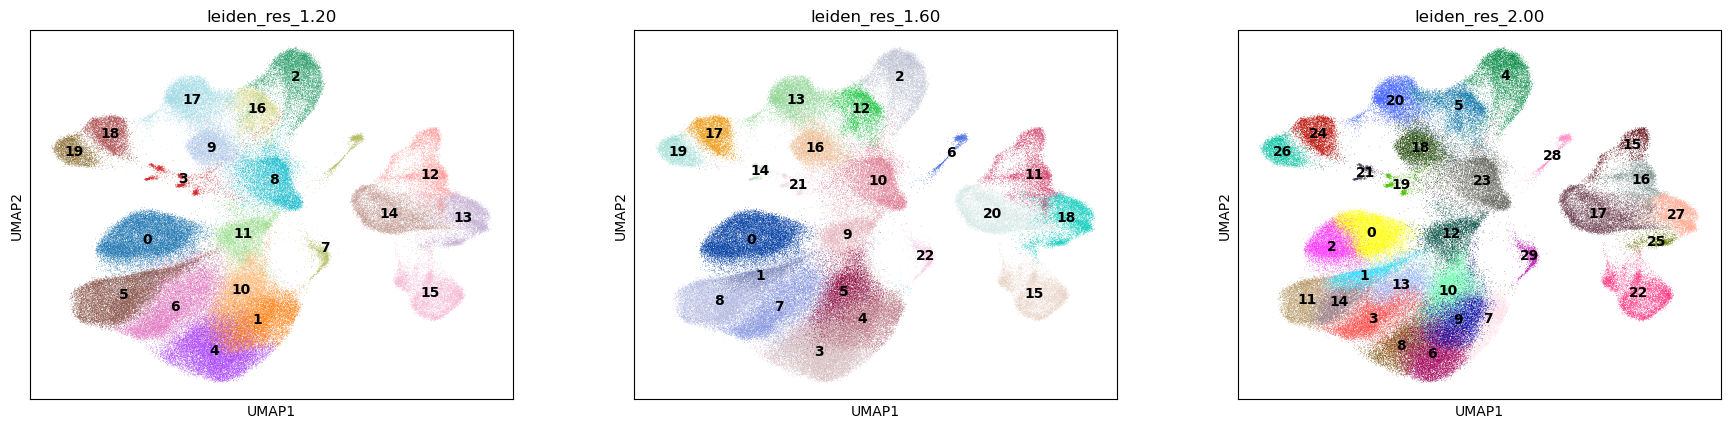

In [47]:
sc.pl.umap(
    adata_filtered,
    color=["leiden_res_1.20", "leiden_res_1.60", "leiden_res_2.00"],
    legend_loc="on data",
)

In [ ]:
sc.pl.umap(
    adata_filtered,
    color=["leiden_res_0.20", "leiden_res_0.60", "leiden_res_1.00"],
    legend_loc="on data",
)

In [44]:
adata_filtered.obs["cell_type"] = adata_filtered.obs["leiden_res_1.00"].map(
    {
        "0": "NK",
        "1": "ILC",
        "2": "Myeloid cells",
        "3": "Myeloid cells",
        "4": "Plasma",
        "5": "T cells",
        "6": "T cells",
        "7": "T cells",
        "8": "Epi",
        "9": "Myeloid cells",
        "10": "Myeloid cells",
        "11": "Mast cells",
        "12": "Endo",
        "13": "Endo",
        "14": "Myeloid cells",
        "15": "Fibroblast",
        "16": "B cells",
        "17": "Endo"
    }
)

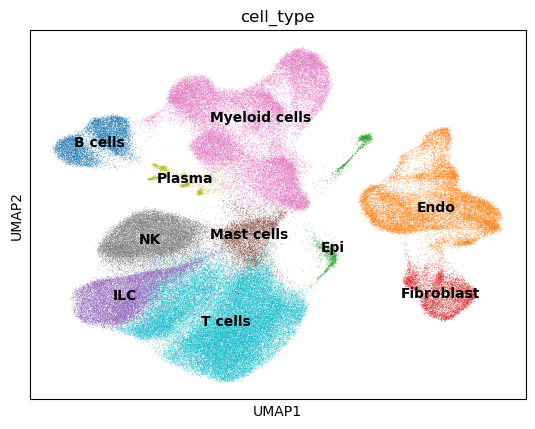

In [45]:
sc.pl.umap(
    adata_filtered,
    color=["cell_type"],
    legend_loc="on data",
)

In [54]:
adata_filtered.write("./adata_major.h5ad")

In [107]:
umap_df = adata_filtered.obs.copy()
umap_df[['UMAP1', 'UMAP2']] = adata_filtered.obsm['X_umap']
umap_df.head()

sample  n_genes_by_counts  log1p_n_genes_by_counts  total_counts  \
CELL1_N2    HTJT               1246                 7.128496        2641.0   
CELL2_N2    HTJT               2520                 7.832411        7083.0   
CELL8_N3    HTJT               1268                 7.145984        3866.0   
CELL10_N2   HTJT               1288                 7.161622        3901.0   
CELL11_N2   HTJT               1467                 7.291656        4106.0   

           log1p_total_counts  pct_counts_in_top_50_genes  \
CELL1_N2             7.879292                   26.656569   
CELL2_N2             8.865594                   31.342651   
CELL8_N3             8.260234                   36.575272   
CELL10_N2            8.269244                   35.324276   
CELL11_N2            8.320448                   32.951778   

           pct_counts_in_top_100_genes  pct_counts_in_top_200_genes  \
CELL1_N2                     38.394548                    51.419917   
CELL2_N2                     39.248906                    48.722293   
CELL8_N3                     51.733057                    65.028453   
CELL10_N2                    50.499872                    63.342733   
CELL11_N2                    45.372625                    57.866537   

           pct_counts_in_top_500_genes  total_counts_mt  ...  leiden_res_1.60  \
CELL1_N2                     71.753124             65.0  ...                0   
CELL2_N2                     64.097134            102.0  ...                2   
CELL8_N3                     80.134506             86.0  ...                3   
CELL10_N2                    79.800051             32.0  ...                0   
CELL11_N2                    74.963468             38.0  ...                1   

           leiden_res_1.80  leiden_res_2.00   S_score  G2M_score  phase  \
CELL1_N2                 0                0  0.003318   0.019487    G2M   
CELL2_N2                 2                4 -0.005169  -0.084757     G1   
CELL8_N3                 4                6 -0.029017  -0.067922     G1   
CELL10_N2                0                0 -0.026305  -0.013071     G1   
CELL11_N2                9                1 -0.023555  -0.034693     G1   

           leiden      cell_type     UMAP1      UMAP2  
CELL1_N2        0             NK -2.217170   2.510282  
CELL2_N2        2  Myeloid cells  3.883457  15.020568  
CELL8_N3        5        T cells  0.038008  -3.330939  
CELL10_N2       0             NK -2.426940   2.405307  
CELL11_N2       1            ILC -3.417546   0.639842  

[5 rows x 38 columns]

In [108]:
umap_df.to_csv("./cellinfo.csv")

In [52]:
celltype_markers = {
    "Hepatocyte": [
        "ALB",     # Albumin
        #"TAT",     # Tyrosine aminotransferase
        "CYP3A4",  # Cytochrome P450 family
        "HP",      # Haptoglobin
        "TF",      # Transferrin
        "APOA1"    # Apolipoprotein A1
    ],
    "Cholangiocyte": [
        "KRT19",   # Cytokeratin 19
        "SOX9",    # Transcription factor
        "EPCAM",   # Epithelial marker
        "ANXA4",   # Annexin A4
        "CFTR"     # Cystic fibrosis transmembrane regulator
    ],
    "Hepatoblast": [
      #  "DLK1",    # Delta like non-canonical Notch ligand 1
        "AFP",     # Alpha fetoprotein
        "KRT8",    # Early epithelial marker
        "PROM1",   # CD133
        "EPCAM",   # Shared with cholangiocyte but higher in progenitors
        "CD24"     # Stem/progenitor marker
    ]
}


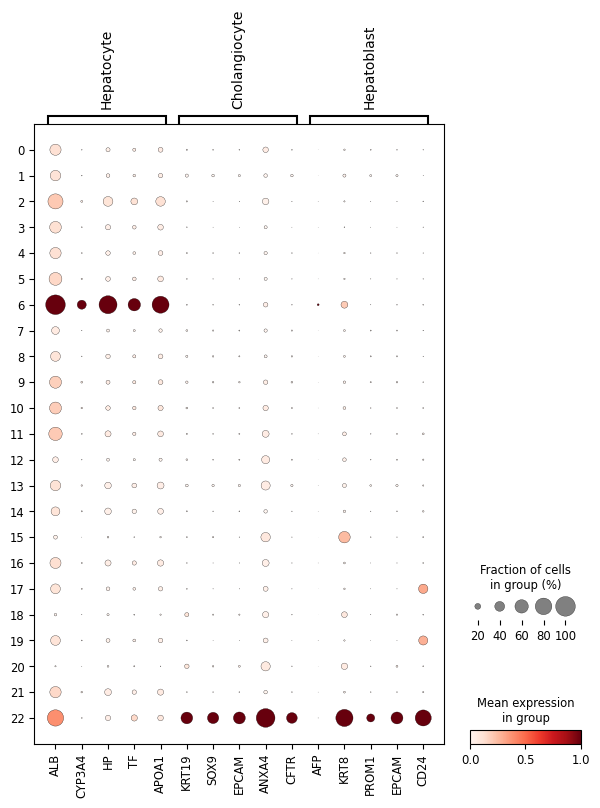

In [53]:
sc.pl.dotplot(adata_filtered, celltype_markers, groupby="leiden_res_1.60", standard_scale="var")

In [76]:
adata_T = adata_filtered[adata_filtered.obs["cell_type"] == "T cells"].copy()

In [66]:
adata_T

AnnData object with n_obs × n_vars = 46635 × 25365
    obs: 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'doublet_score', 'predicted_doublet', 'leiden_res_0.20', 'leiden_res_0.40', 'leiden_res_0.60', 'leiden_res_0.80', 'leiden_res_1.00', 'leiden_res_1.20', 'leiden_res_1.40', 'leiden_res_1.60', 'leiden_res_1.80', 'leiden_res_2.00', 'S_score', 'G2M_score', 'phase', 'leiden', 'cell_type'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variabl

In [67]:
sc.pp.normalize_total(adata_T)
# Logarithmize the data
sc.pp.log1p(adata_T)

/home/jpc/anaconda3/envs/scanpy_env/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:234: UserWarning: Some cells have zero counts
  warn(UserWarning("Some cells have zero counts"))


/home/jpc/anaconda3/envs/scanpy_env/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:385: RuntimeWarning: invalid value encountered in log1p
  np.log1p(X, out=X)


In [73]:
adata_T.var.index

Index(['AL627309.1', 'AL627309.5', 'LINC01128', 'AL645608.6', 'LINC01409',
       'AL390719.3', 'AGRN', 'FAM41C', 'TTLL10', 'LINC01342',
       ...
       'EIF1AY', 'AC136616.3', 'AC145212.1', 'MAFIP', 'AC011043.1',
       'AL592183.1', 'AC007325.4', 'AL354822.1', 'AC004556.3', 'AC240274.1'],
      dtype='object', length=25365)

In [75]:
#print("非零值比例:", np.count_nonzero(adata_T.X)/adata_T.X.size)

非零值比例: 1.0


In [91]:
sc.pp.highly_variable_genes(adata_T, n_top_genes=1000)

/home/jpc/anaconda3/envs/scanpy_env/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:305: RuntimeWarning: invalid value encountered in log
  dispersion = np.log(dispersion)


In [92]:
 sc.tl.pca(adata_T)
 sc.tl.umap(adata_T)

In [93]:
adata_T.obs.keys

<bound method NDFrame.keys of                sample  n_genes_by_counts  log1p_n_genes_by_counts  \
CELL8_N3         HTJT               1268                 7.145984   
CELL18_N3        HTJT               1534                 7.336286   
CELL19_N3        HTJT               1590                 7.372118   
CELL31_N4        HTJT               1617                 7.388946   
CELL35_N2        HTJT               1134                 7.034388   
...               ...                ...                      ...   
CELL28431_N1-1   CYWT               2400                 7.783641   
CELL28475_N1-2   CYWT               1784                 7.487174   
CELL28502_N1-3   CYWT               2620                 7.871311   
CELL28510_N1-3   CYWT               2625                 7.873217   
CELL28519_N1-2   CYWT               1676                 7.424762   

                total_counts  log1p_total_counts  pct_counts_in_top_50_genes  \
CELL8_N3              3866.0            8.260234             

In [94]:
for res in np.arange(0.2, 1.01, 0.2):
    sc.tl.leiden(
        adata_T, key_added=f"leiden_res_{res:4.2f}", resolution=res, flavor="igraph"
    )

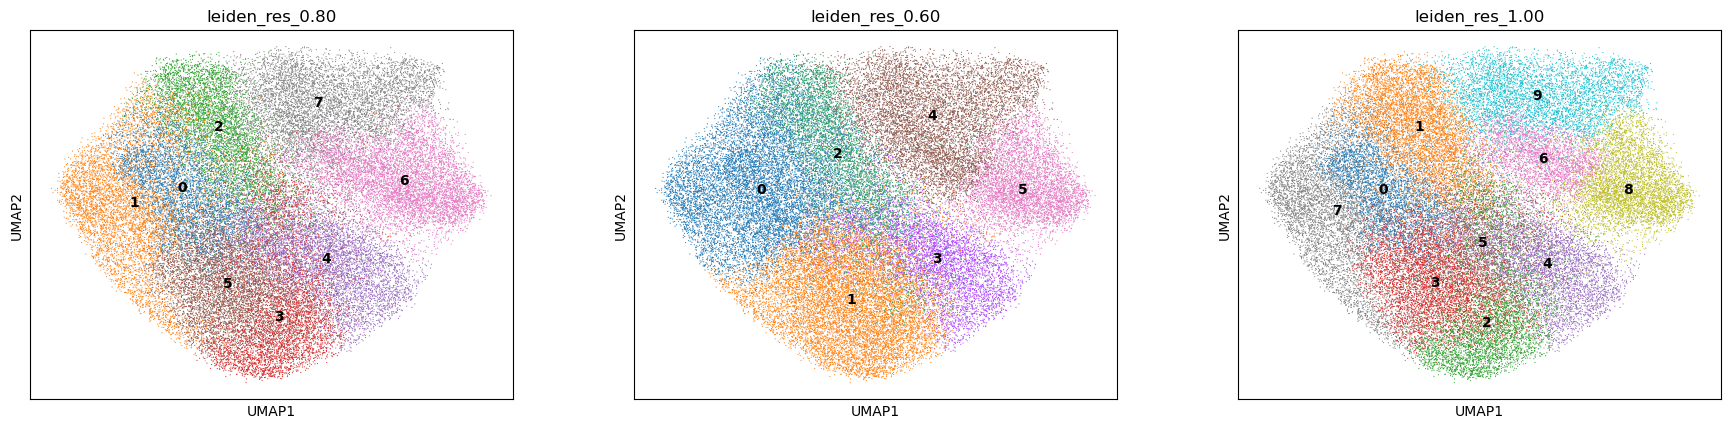

In [88]:
sc.pl.umap(
    adata_T,
    color=["leiden_res_0.80", "leiden_res_0.60", "leiden_res_1.00"],
    legend_loc="on data",
) #HVG 1000, 2000差不多

/home/jpc/anaconda3/envs/scanpy_env/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:305: RuntimeWarning: invalid value encountered in log
  dispersion = np.log(dispersion)


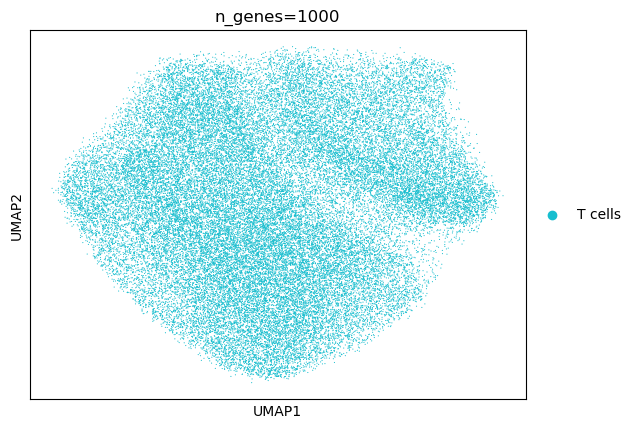

/home/jpc/anaconda3/envs/scanpy_env/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:305: RuntimeWarning: invalid value encountered in log
  dispersion = np.log(dispersion)


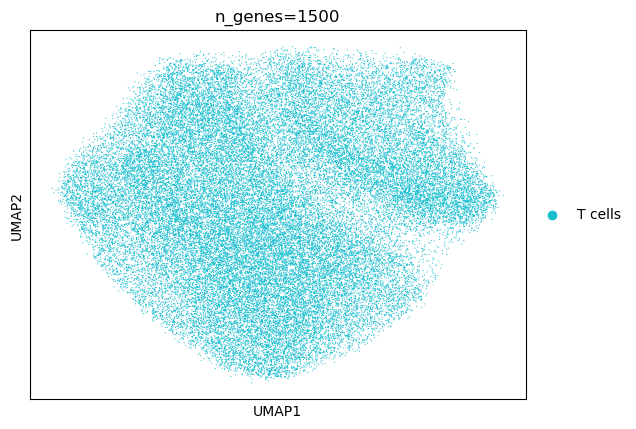

In [89]:
for n in [1000, 1500]:
    sc.pp.highly_variable_genes(adata_T, n_top_genes=n)
    sc.tl.pca(adata_T);
    sc.tl.umap(adata_T)
    sc.tl.leiden(
        adata_filtered, resolution=0.80, flavor="igraph" )
    sc.pl.umap(adata_T, color='cell_type', title=f'n_genes={n}')


In [104]:
Tmarker_genes = { 
  "CD4+": ["CD4"],
  "CD8+":["CD8A","CD8B"],
  "Treg":["FOXP3","IL2RA","TNFRSF18","LAYN"] #"CCR8",
}

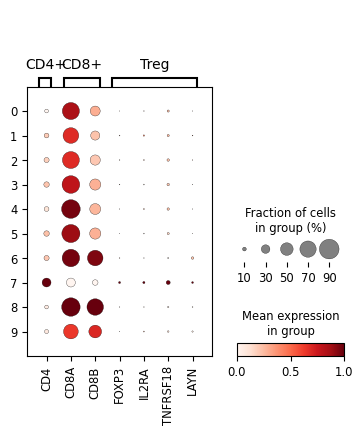

In [105]:
sc.pl.dotplot(adata_T, Tmarker_genes, groupby="leiden_res_1.00", standard_scale="var")